#**Extracción**

In [38]:
import pandas as pd

In [39]:
datos = pd.read_json('TelecomX_Data.json')
datos.head()

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


#**Transformación**

In [40]:
# Ver columnas y tipos de datos
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   customerID  7267 non-null   object
 1   Churn       7267 non-null   object
 2   customer    7267 non-null   object
 3   phone       7267 non-null   object
 4   internet    7267 non-null   object
 5   account     7267 non-null   object
dtypes: object(6)
memory usage: 340.8+ KB


In [41]:
datos.describe(include='all')

,customerID,Churn,customer,phone,internet,account
count,7267,7267,7267,7267,7267,7267
unique,7267,3,891,3,129,6931
top,9995-HOTOH,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'No', 'OnlineSecurity': 'N...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
freq,1,5174,223,3495,1581,6


In [42]:
# Expandir columnas anidadas y unirlas al dataframe principal
customer_df = pd.json_normalize(datos['customer'])
phone_df = pd.json_normalize(datos['phone'])
internet_df = pd.json_normalize(datos['internet'])
account_df = pd.json_normalize(datos['account'])

# Unir todo en un solo dataframe plano
datos_limpios = pd.concat([datos[['customerID', 'Churn']], customer_df, phone_df, internet_df, account_df], axis=1)

# Verifica el resultado
datos_limpios.info()
datos_limpios.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7267 non-null   object 
 2   gender            7267 non-null   object 
 3   SeniorCitizen     7267 non-null   int64  
 4   Partner           7267 non-null   object 
 5   Dependents        7267 non-null   object 
 6   tenure            7267 non-null   int64  
 7   PhoneService      7267 non-null   object 
 8   MultipleLines     7267 non-null   object 
 9   InternetService   7267 non-null   object 
 10  OnlineSecurity    7267 non-null   object 
 11  OnlineBackup      7267 non-null   object 
 12  DeviceProtection  7267 non-null   object 
 13  TechSupport       7267 non-null   object 
 14  StreamingTV       7267 non-null   object 
 15  StreamingMovies   7267 non-null   object 
 16  Contract          7267 non-null   object 


,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


In [43]:
# Revisar tipos de datos
print("Tipos de datos:")
print(datos_limpios.dtypes)

# Convertir a numérico
datos_limpios['Charges.Total'] = pd.to_numeric(datos_limpios['Charges.Total'], errors='coerce')

# Verificar nulos en las columnas de gastos
print(datos_limpios[['Charges.Monthly', 'Charges.Total']].isnull().sum())

Tipos de datos:
customerID           object
Churn                object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
Charges.Monthly     float64
Charges.Total        object
dtype: object
Charges.Monthly     0
Charges.Total      11
dtype: int64


In [44]:
# Crear la columna Cuentas_Diarias
datos_limpios['Cuentas_Diarias'] = datos_limpios['Charges.Monthly'] / 30
datos_limpios[['Charges.Monthly', 'Cuentas_Diarias']].head()

,Charges.Monthly,Cuentas_Diarias
0,65.6,2.186667
1,59.9,1.996667
2,73.9,2.463333
3,98.0,3.266667
4,83.9,2.796667


In [45]:
print("DataFrame limpio:")
print(datos_limpios.info())

DataFrame limpio:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7267 non-null   object 
 2   gender            7267 non-null   object 
 3   SeniorCitizen     7267 non-null   int64  
 4   Partner           7267 non-null   object 
 5   Dependents        7267 non-null   object 
 6   tenure            7267 non-null   int64  
 7   PhoneService      7267 non-null   object 
 8   MultipleLines     7267 non-null   object 
 9   InternetService   7267 non-null   object 
 10  OnlineSecurity    7267 non-null   object 
 11  OnlineBackup      7267 non-null   object 
 12  DeviceProtection  7267 non-null   object 
 13  TechSupport       7267 non-null   object 
 14  StreamingTV       7267 non-null   object 
 15  StreamingMovies   7267 non-null   object 
 16  Contract          7267 n

In [46]:
print(datos_limpios['Churn'].unique())

['No' 'Yes' '']


#**Carga y Análisis**

Churn
No     5174
Yes    1869
Name: count, dtype: int64


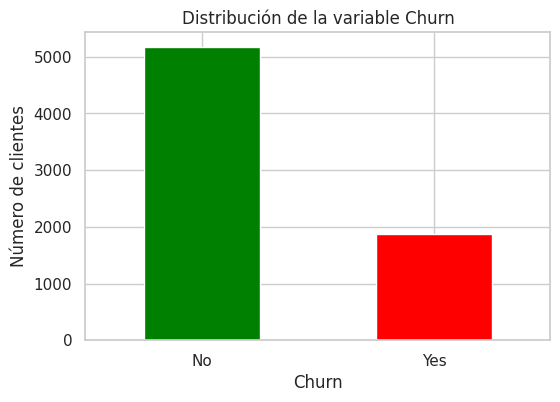

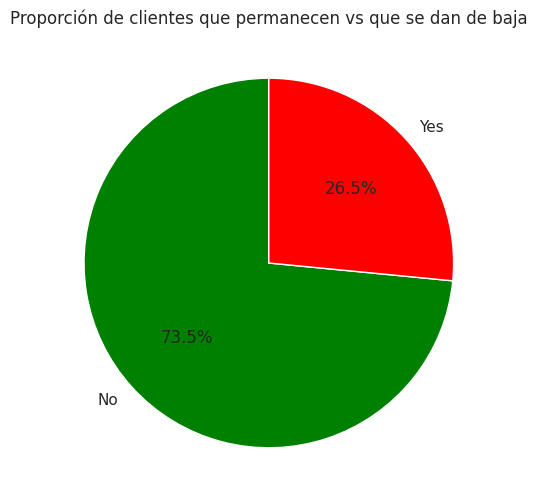

In [47]:
import matplotlib.pyplot as plt

# Eliminar filas con valores vacíos en 'Churn'
datos_limpios = datos_limpios[datos_limpios['Churn'] != '']

# Contar valores únicos para Churn
conteo_churn = datos_limpios['Churn'].value_counts()

print(conteo_churn)

# Gráfico de barras
plt.figure(figsize=(6,4))
conteo_churn.plot(kind='bar', color=['green', 'red'])
plt.title('Distribución de la variable Churn')
plt.xlabel('Churn')
plt.ylabel('Número de clientes')
plt.xticks(rotation=0)
plt.show()

# Gráfico circular (pie chart)
plt.figure(figsize=(6,6))
conteo_churn.plot(kind='pie', autopct='%1.1f%%', colors=['green', 'red'], startangle=90)
plt.ylabel('')
plt.title('Proporción de clientes que permanecen vs que se dan de baja')
plt.show()

In [49]:
# Seleccionar solo columnas numéricas
numericas = datos_limpios.select_dtypes(include=['int64', 'float64'])

estadisticas_num = numericas.describe().T

# Calcular la mediana solo para columnas numéricas
medianas = numericas.median()
estadisticas_num['mediana'] = medianas

print("Estadísticas descriptivas para variables numéricas:")
print(estadisticas_num[['mean', 'mediana', 'std', 'min', '25%', '50%', '75%', 'max']])

Estadísticas descriptivas para variables numéricas:
                        mean   mediana          std        min         25%  \
SeniorCitizen       0.162147     0.000     0.368612   0.000000    0.000000   
tenure             32.371149    29.000    24.559481   0.000000    9.000000   
Charges.Monthly    64.761692    70.350    30.090047  18.250000   35.500000   
Charges.Total    2283.300441  1397.475  2266.771362  18.800000  401.450000   
Cuentas_Diarias     2.158723     2.345     1.003002   0.608333    1.183333   

                      50%        75%          max  
SeniorCitizen       0.000     0.0000     1.000000  
tenure             29.000    55.0000    72.000000  
Charges.Monthly    70.350    89.8500   118.750000  
Charges.Total    1397.475  3794.7375  8684.800000  
Cuentas_Diarias     2.345     2.9950     3.958333  


In [51]:
import seaborn as sns

# Limpiar valores vacíos en Churn
datos_limpios = datos_limpios[datos_limpios['Churn'] != '']

# Variables numéricas a analizar
variables_num = ['Charges.Total', 'tenure', 'Charges.Monthly', 'Cuentas_Diarias']

# Estadísticas descriptivas agrupadas por Churn
print(datos_limpios.groupby('Churn')[variables_num].describe())

      Charges.Total                                                     \
              count         mean          std    min      25%      50%   
Churn                                                                    
No           5163.0  2555.344141  2329.456984  18.80  577.825  1683.60   
Yes          1869.0  1531.796094  1890.822994  18.85  134.500   703.55   

                          tenure             ... Charges.Monthly          \
            75%      max   count       mean  ...             75%     max   
Churn                                        ...                           
No     4264.125  8672.45  5174.0  37.569965  ...            88.4  118.75   
Yes    2331.300  8684.80  1869.0  17.979133  ...            94.2  118.35   

      Cuentas_Diarias                                                  \
                count      mean       std       min       25%     50%   
Churn                                                                   
No             5174.0  2.0421

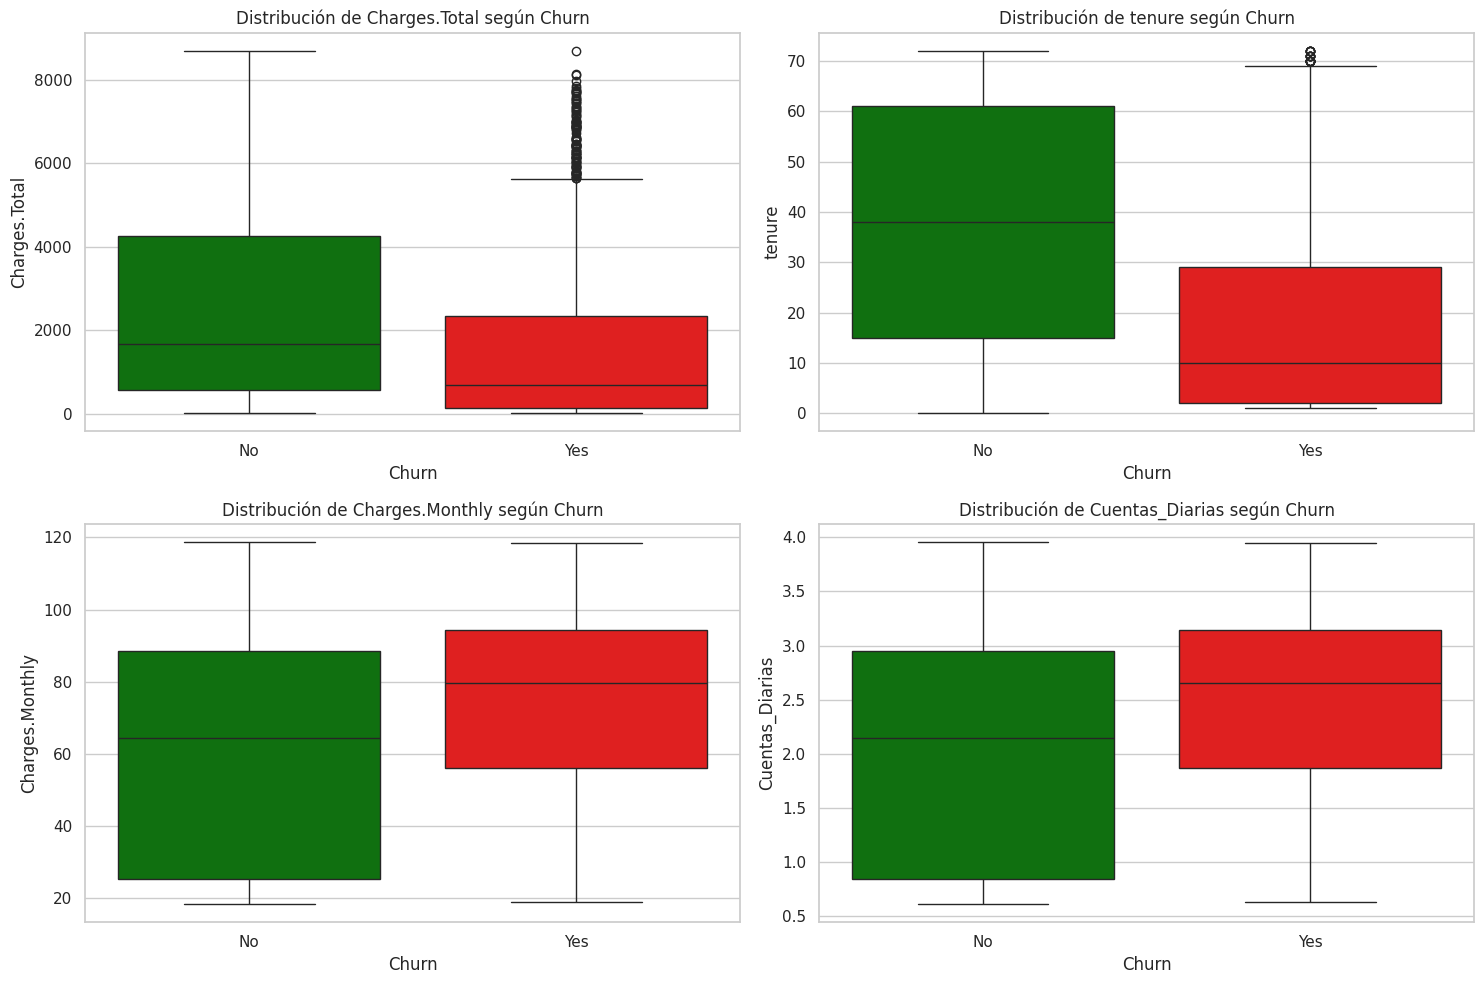

In [53]:
plt.figure(figsize=(15, 10))
palette = {'No': 'green', 'Yes': 'red'}

for i, var in enumerate(variables_num, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(x='Churn', y=var, hue='Churn', data=datos_limpios, palette=palette, dodge=False)
    plt.title(f'Distribución de {var} según Churn')
    plt.xlabel('Churn')
    plt.ylabel(var)
    plt.legend([], [], frameon=False)  # Oculta leyenda para que no se duplique

plt.tight_layout()
plt.show()

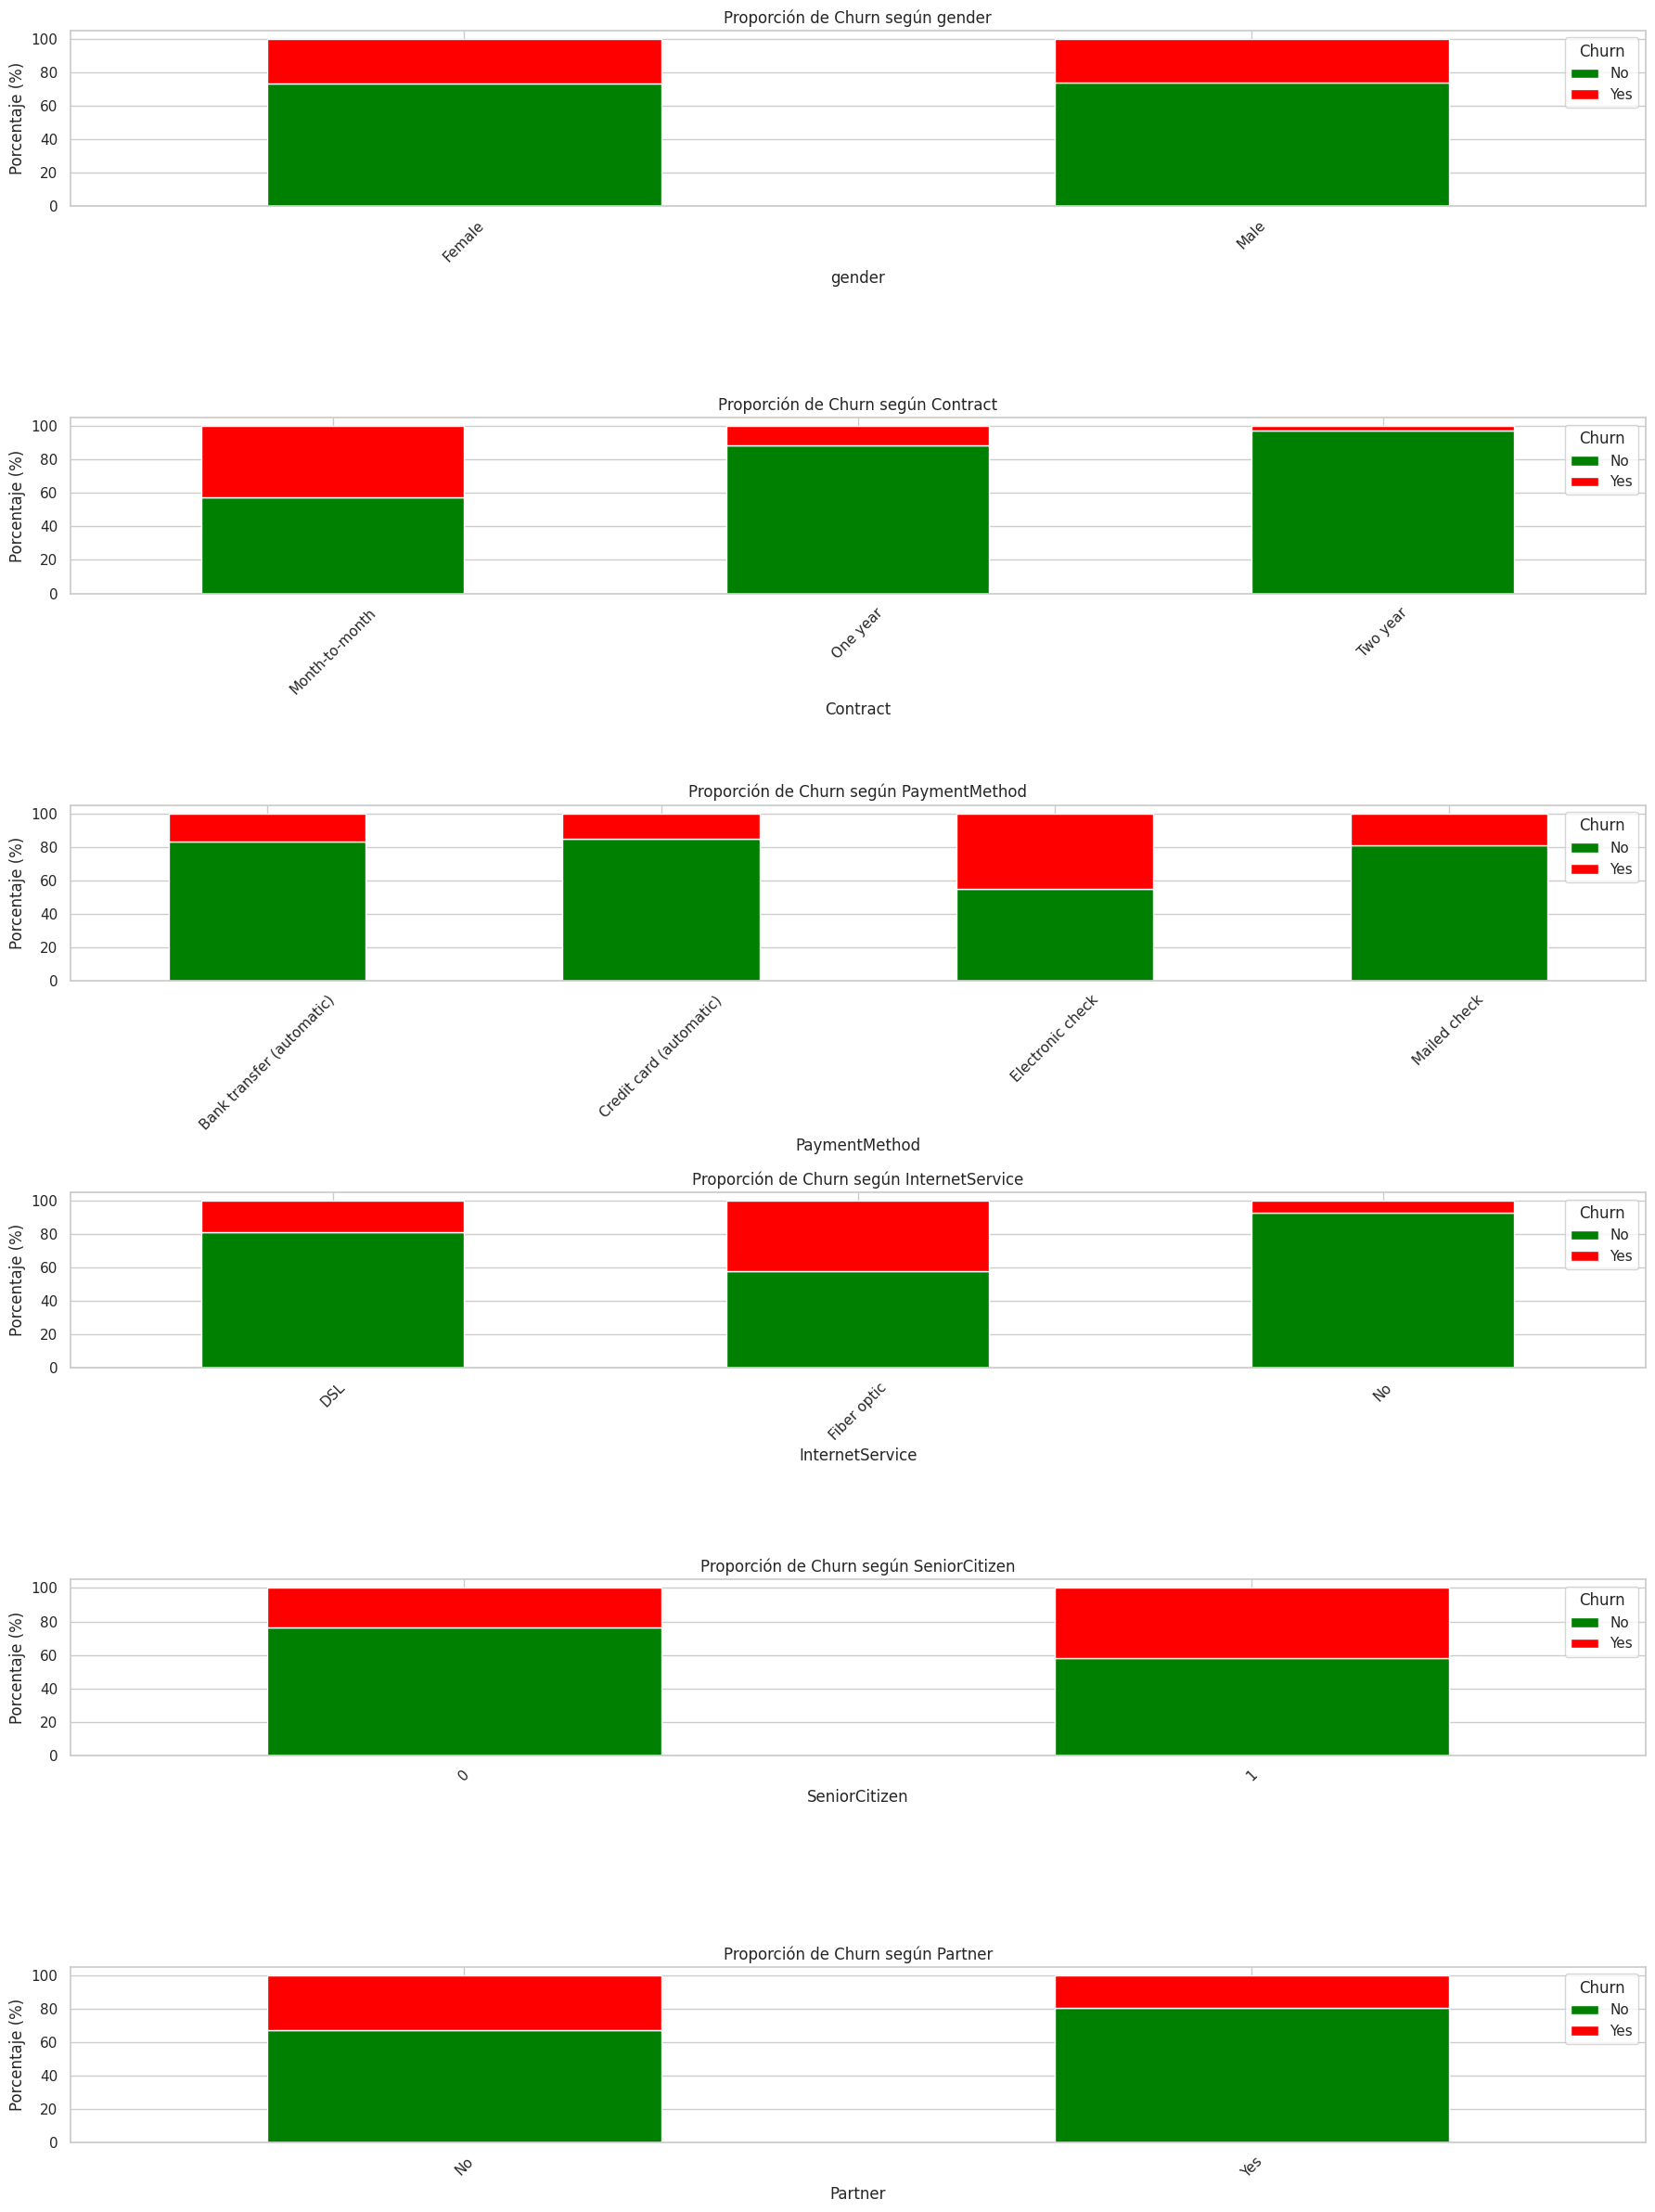

In [54]:
# Limpiar valores vacíos en Churn
datos_limpios = datos_limpios[datos_limpios['Churn'] != '']

# Lista de variables categóricas que quieres explorar
variables_cat = ['gender', 'Contract', 'PaymentMethod', 'InternetService', 'SeniorCitizen', 'Partner']

plt.figure(figsize=(18, 4 * len(variables_cat)))

for i, var in enumerate(variables_cat, 1):
    plt.subplot(len(variables_cat), 1, i)

    # Crear tabla de contingencia normalizada para proporciones de churn por categoría
    prop_churn = pd.crosstab(datos_limpios[var], datos_limpios['Churn'], normalize='index') * 100

    prop_churn.plot(kind='bar', stacked=True, color=['green', 'red'], ax=plt.gca())

    plt.title(f'Proporción de Churn según {var}')
    plt.ylabel('Porcentaje (%)')
    plt.xlabel(var)
    plt.legend(title='Churn', loc='upper right')
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

##**Informe Final**

### Introducción


El presente análisis tiene como objetivo entender el comportamiento de los clientes de una empresa de servicios, focalizándonos en la evasión o abandono del servicio, conocida como Churn. La evasión impacta directamente en los ingresos y crecimiento de la compañía, por lo que comprender qué factores influyen en esta conducta permitirá diseñar estrategias efectivas para retener clientes.

###Limpieza y Tratamiento de Datos

*   Se importó un dataset con 7267 registros y 22 columnas.
*   Se detectaron y eliminaron registros con valores vacíos o inconsistentes en la columna clave Churn.
*   Se identificaron variables numéricas y categóricas para análisis diferenciados.
*   Se revisó y corregió tipos de datos para facilitar los cálculos y visualizaciones.

###Análisis Exploratorio de Datos

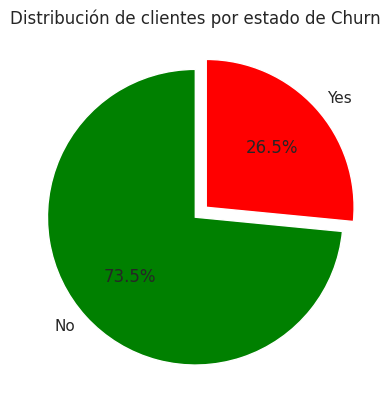

In [55]:
# Conteo de clientes por Churn
churn_counts = datos_limpios['Churn'].value_counts()
churn_counts.plot(kind='pie', autopct='%1.1f%%', colors=['green', 'red'], startangle=90, explode=[0, 0.1])
plt.title('Distribución de clientes por estado de Churn')
plt.ylabel('')
plt.show()

###Variables Numéricas por Estado de Churn

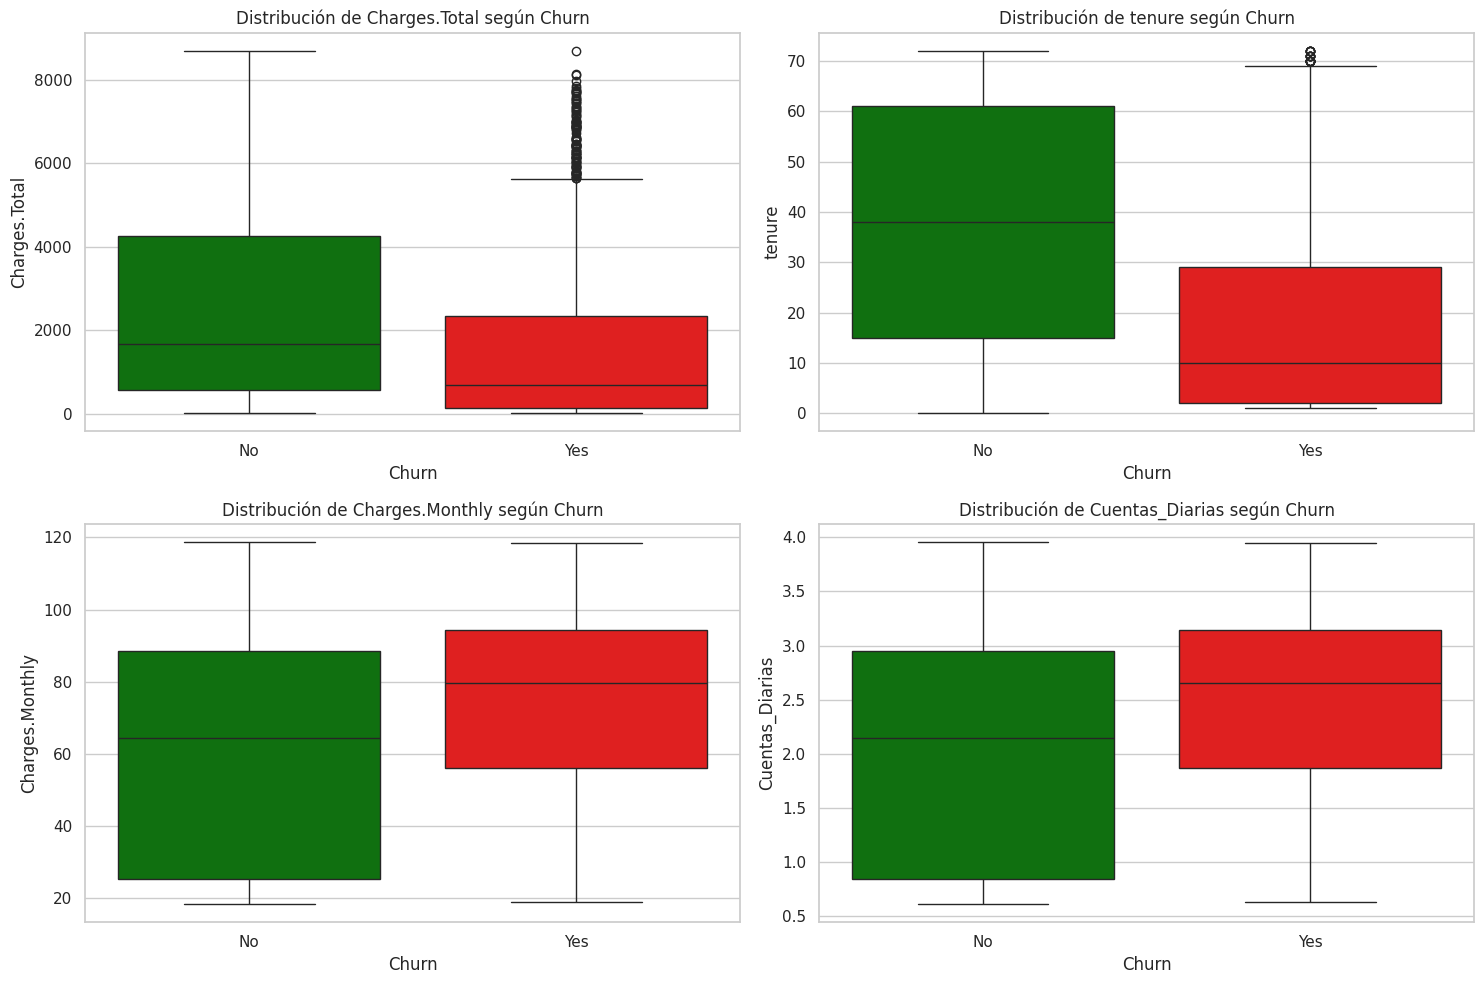

In [56]:
variables_num = ['Charges.Total', 'tenure', 'Charges.Monthly', 'Cuentas_Diarias']
palette = {'No': 'green', 'Yes': 'red'}

plt.figure(figsize=(15, 10))
for i, var in enumerate(variables_num, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(x='Churn', y=var, hue='Churn', data=datos_limpios, palette=palette, dodge=False)
    plt.title(f'Distribución de {var} según Churn')
    plt.xlabel('Churn')
    plt.ylabel(var)
    plt.legend([], [], frameon=False)
plt.tight_layout()
plt.show()

###Distribución de Churn según Variables Categóricas

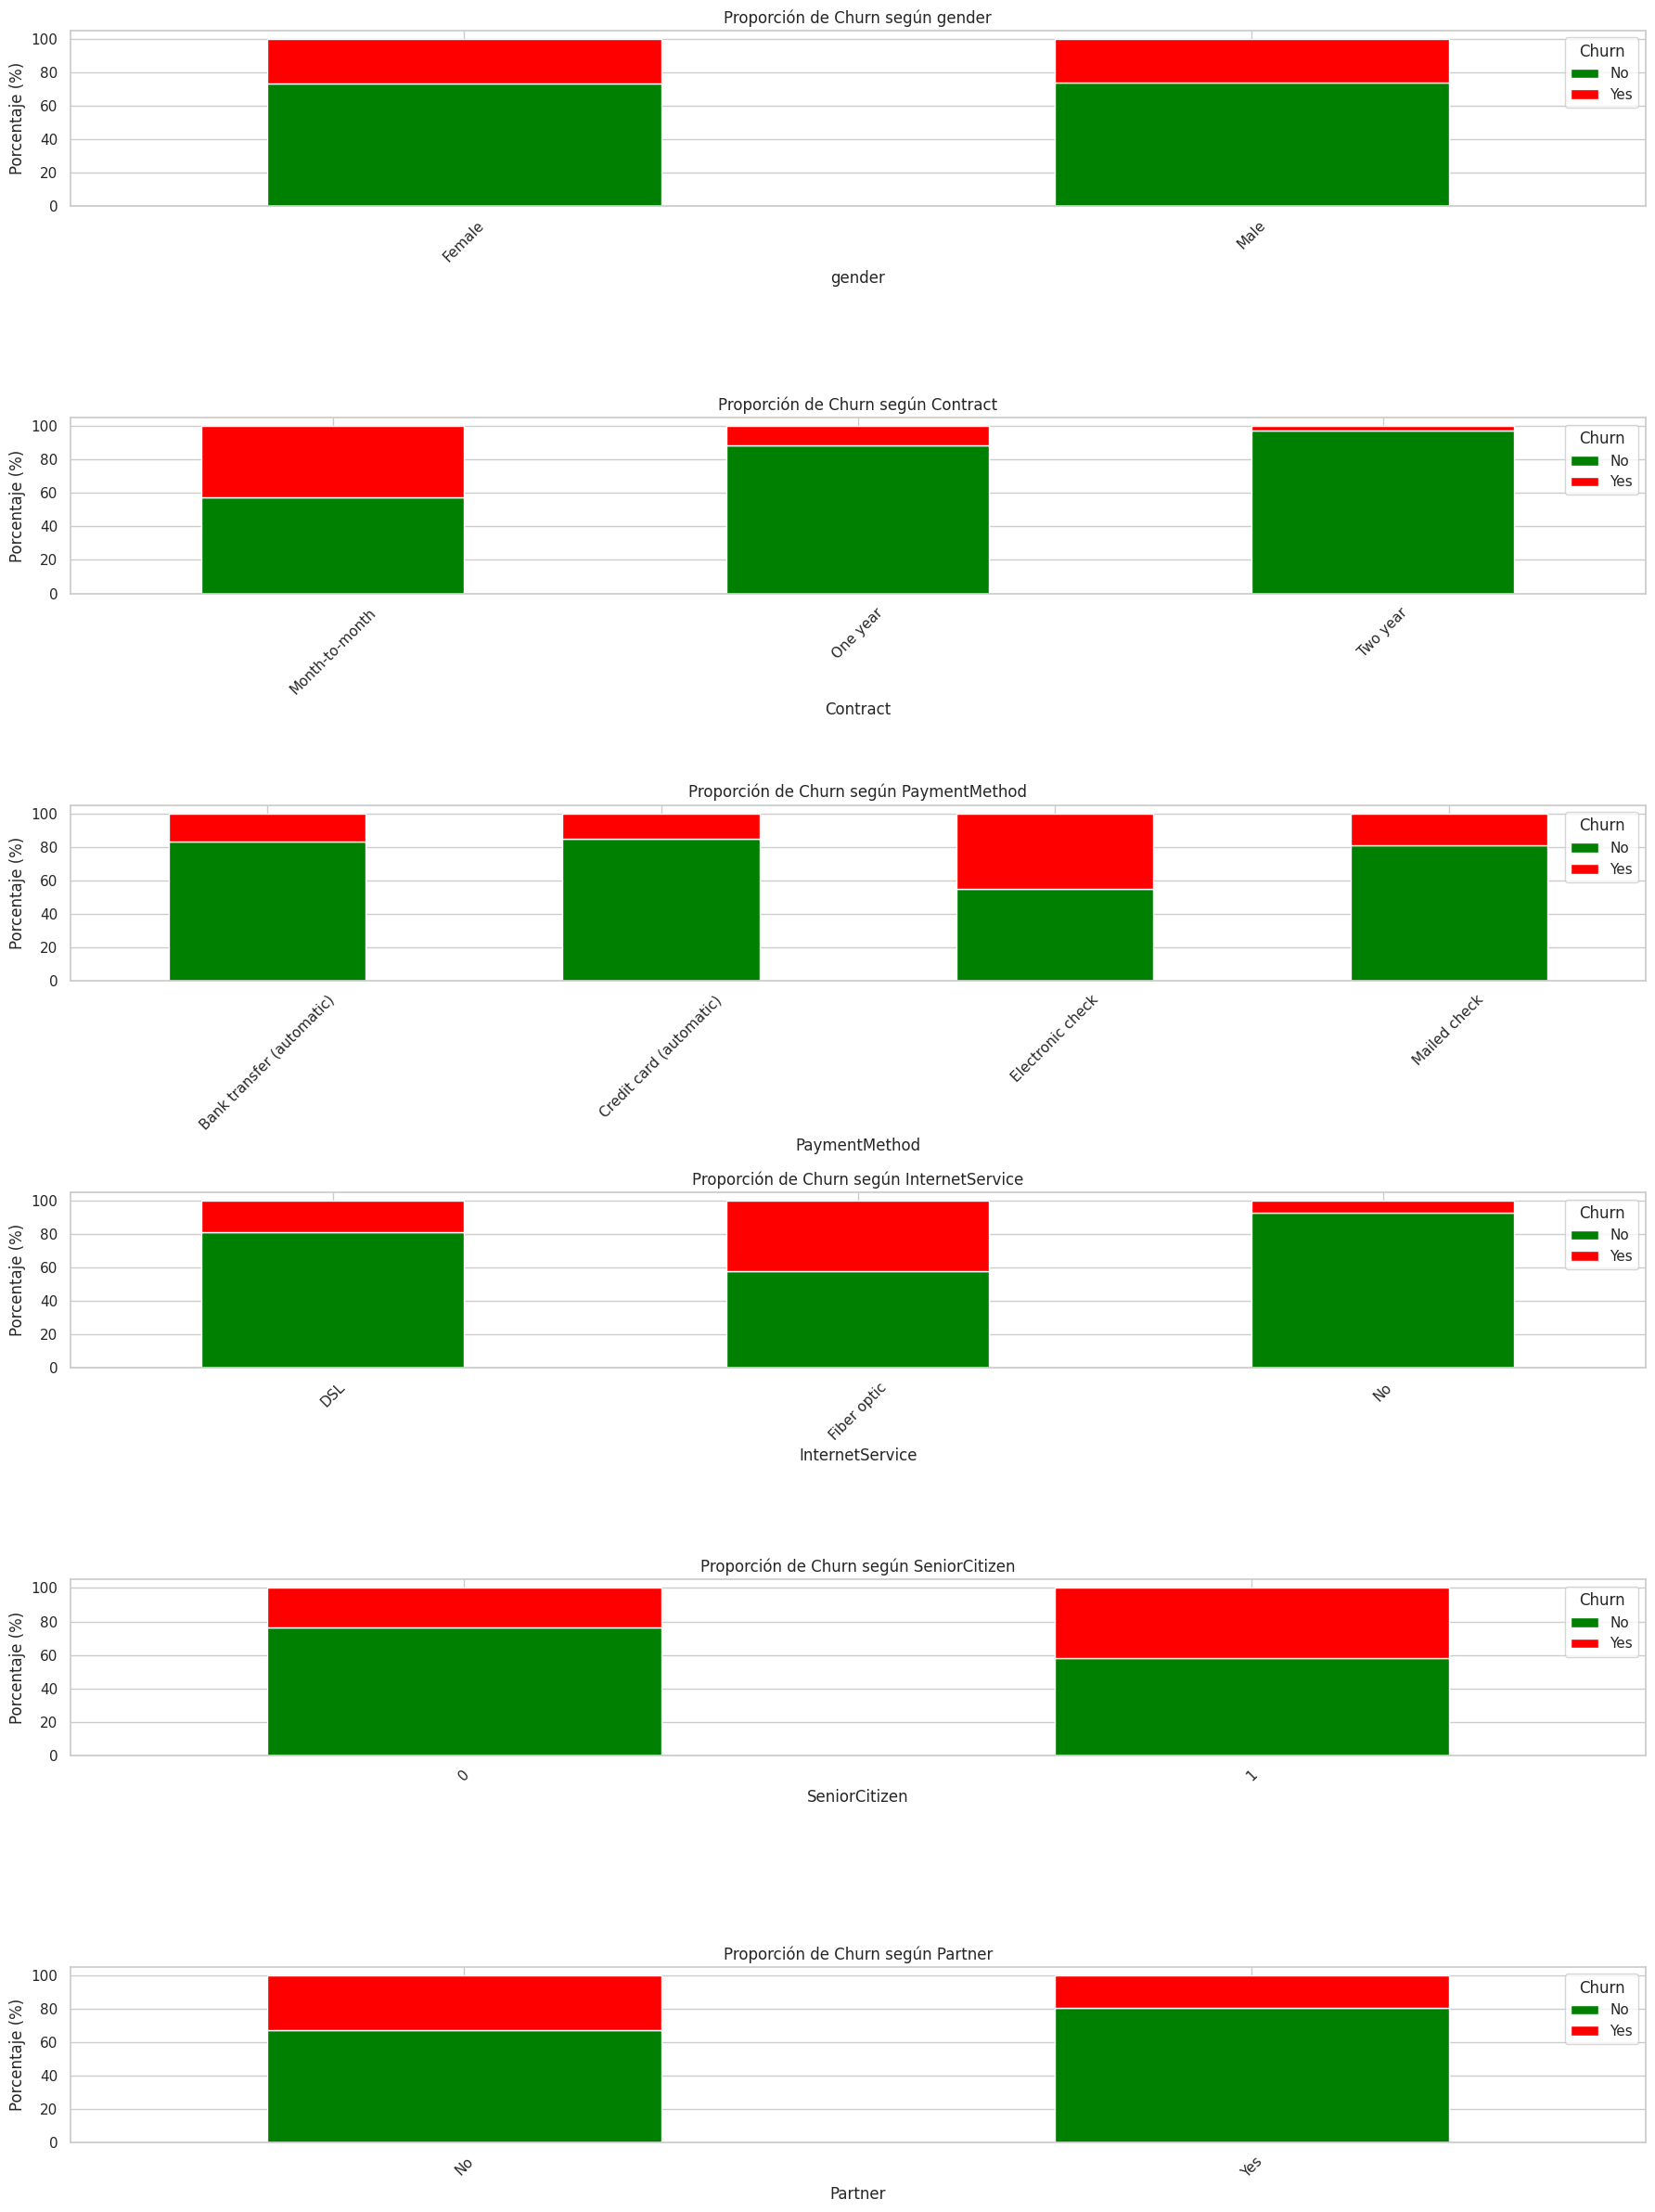

In [57]:
variables_cat = ['gender', 'Contract', 'PaymentMethod', 'InternetService', 'SeniorCitizen', 'Partner']

plt.figure(figsize=(18, 4 * len(variables_cat)))
for i, var in enumerate(variables_cat, 1):
    plt.subplot(len(variables_cat), 1, i)
    prop_churn = pd.crosstab(datos_limpios[var], datos_limpios['Churn'], normalize='index') * 100
    prop_churn.plot(kind='bar', stacked=True, color=['green', 'red'], ax=plt.gca())
    plt.title(f'Proporción de Churn según {var}')
    plt.ylabel('Porcentaje (%)')
    plt.xlabel(var)
    plt.legend(title='Churn', loc='upper right')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

###Conclusiones e Insights

Los clientes que permanecen tienen una mayor antigüedad (tenure) y mayor gasto total (Charges.Total).

Los clientes que cancelan tienden a tener un gasto mensual un poco más alto, lo que podría indicar sensibilidad al precio.

Variables categóricas como el tipo de contrato y método de pago muestran diferencias claras en las tasas de churn, siendo clientes con contratos mes a mes y ciertos métodos de pago más propensos a abandonar.

Clientes con mayor uso diario (Cuentas_Diarias) muestran mayor tendencia a cancelar, lo que podría indicar problemas o insatisfacción en el uso.

###Recomendaciones

Ofrecer incentivos y beneficios para clientes con contratos mes a mes, buscando migrarlos a contratos a largo plazo para reducir el churn.

Revisar y posiblemente ajustar los precios de planes con altos cargos mensuales para disminuir la pérdida por sensibilidad a tarifas.

Implementar campañas de fidelización especialmente dirigidas a clientes con menor antigüedad y altos consumos diarios, para mejorar su experiencia y satisfacción.

Profundizar en análisis de métodos de pago para identificar posibles barreras o inconvenientes que lleven a la cancelación.

##Extra

In [58]:
datos_limpios['Churn_binary'] = datos_limpios['Churn'].map({'No': 0, 'Yes': 1})

In [59]:
# Seleccionar variables numéricas relevantes
variables_num = ['Charges.Total', 'tenure', 'Charges.Monthly', 'Cuentas_Diarias']

# Añadir la variable binaria
variables_num.append('Churn_binary')

# Calcular matriz de correlación
corr_matrix = datos_limpios[variables_num].corr()

# Mostrar la correlación con churn
print("Correlación de variables numéricas con Churn:")
print(corr_matrix['Churn_binary'].sort_values(ascending=False))

Correlación de variables numéricas con Churn:
Churn_binary       1.000000
Charges.Monthly    0.193356
Cuentas_Diarias    0.193356
Charges.Total     -0.199484
tenure            -0.352229
Name: Churn_binary, dtype: float64


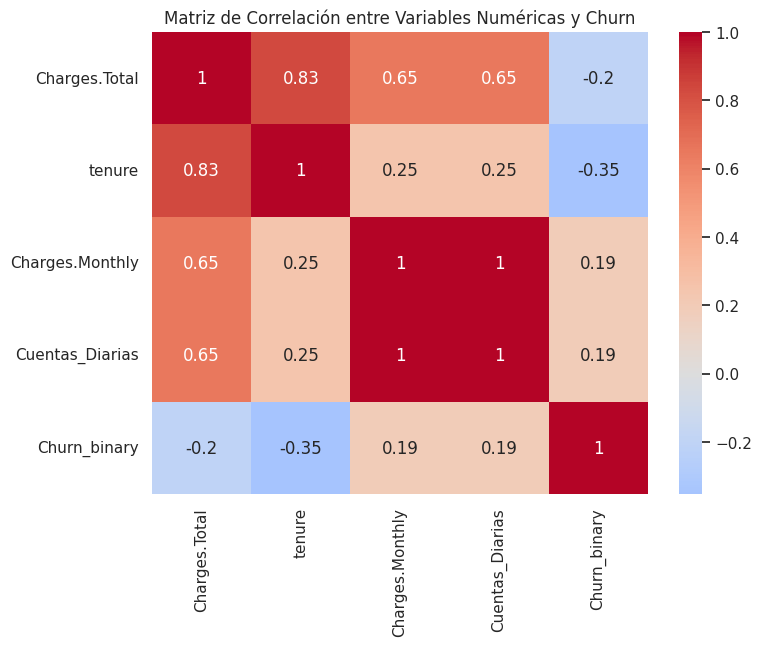

In [60]:
plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Matriz de Correlación entre Variables Numéricas y Churn')
plt.show()

###Scatterplots para explorar relación de variables con churn

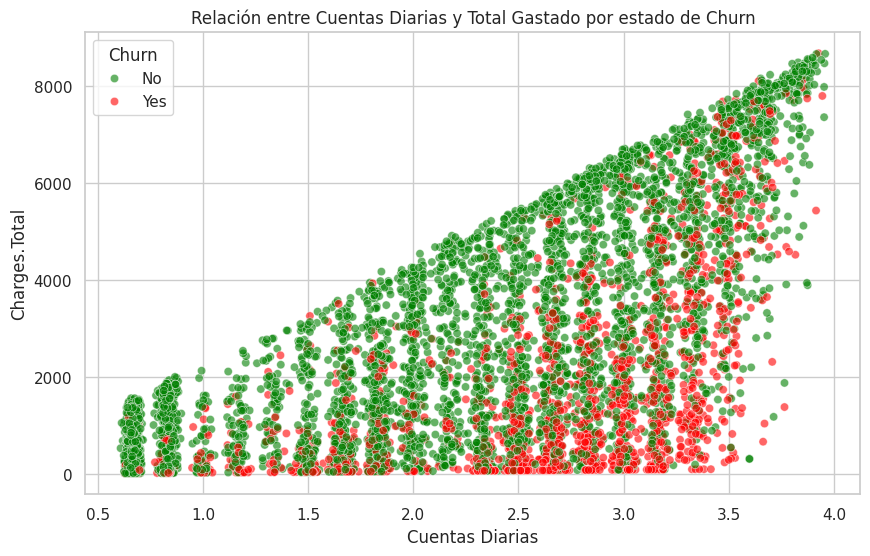

In [61]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=datos_limpios, x='Cuentas_Diarias', y='Charges.Total', hue='Churn', palette={'No':'green','Yes':'red'}, alpha=0.6)
plt.title('Relación entre Cuentas Diarias y Total Gastado por estado de Churn')
plt.xlabel('Cuentas Diarias')
plt.ylabel('Charges.Total')
plt.show()